## Initial Setup
Used to import Geopandas and Numpy, as well as the general shapefile of Pittsburgh.

In [1]:
import pandas as pd
import numpy as np
import geopandas
import csv
import collections
#%matplotlib inline
import matplotlib.pyplot as plt

#shp is shapefile
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
#neighborhoods.plot()

## **Greenways.csv**

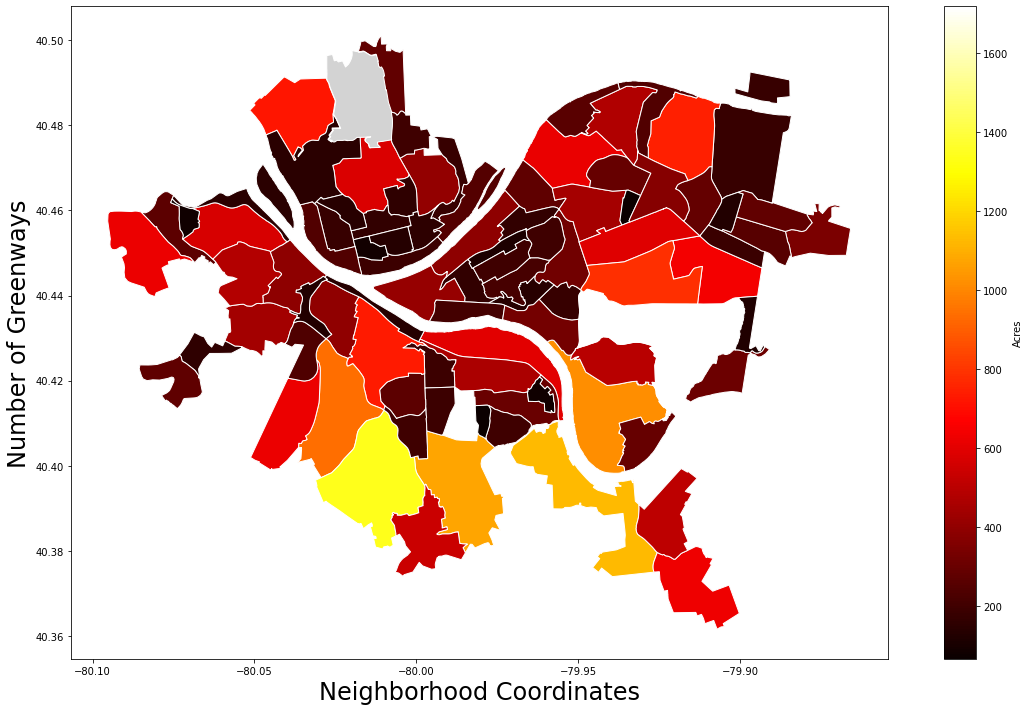

In [27]:
df1 = pd.read_csv("Greenways.csv")
greenways = df1.groupby("nhood").sum()['sqmiles']
greenways.sort_values(ascending=False)

#greenways_map[['hood', 'area', 'acres']]
greenways_map = neighborhoods.merge(greenways, how='left', left_on='hood', right_on='nhood')
greenways_map.plot(column='acres',
                    cmap='hot',
                    edgecolor="white",
                    legend=True,
                    legend_kwds={'label':"Acres"},
                    figsize=(20,12),
                    missing_kwds={"color": "lightgrey"})
# In order to set labels on geopandas graph, we have to use matplotlib
# and 'show' the axis labels
plt.xlabel('Neighborhood Coordinates', fontsize=24)
plt.ylabel('Number of Greenways', fontsize=24)
plt.tick_params(axis='y', which='Neighborhood Coordinates', labelsize=20)
plt.show()

## **Playfields.csv**

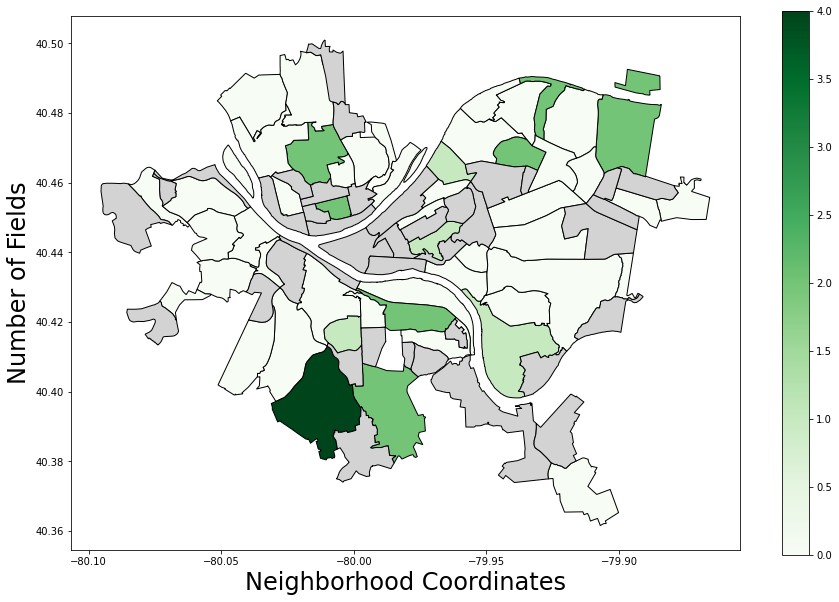

In [29]:
df2 = pd.read_csv("Playfields.csv")
playfields = df2.groupby("neighborhood").sum()['goal_post']

# For playfields, need to go through to count the number of fields per
# neighborhood b/c playfields.csv doesn't have any useful numerical
# data; only info on its location and field dimensions

playfields_map = neighborhoods.merge(playfields, how='left', left_on='hood', right_on='neighborhood')
#playfields_map[['hood', 'park']]
playfields_map.plot(column='goal_post',
                    cmap='Greens',  #fine colorway, just need to edit scale so it's more green
                    edgecolor="black",
                    legend=True,
                    figsize=(15,10),
                    missing_kwds={"color":"lightgrey"})

plt.xlabel('Neighborhood Coordinates', fontsize=24)
plt.ylabel('Number of Fields', fontsize=24)
plt.tick_params(axis='y', which='Neighborhood Coordinates', labelsize=20)
plt.show()

***GREENWAYS***
[('', 3), ('nhood', 1), ('Beechview', 1), ('Hazelwood', 1), ('Perry South', 1), ('Brookline', 1), ('Perry North', 1), ('South Oakland', 1), ('Squirrel Hill South', 1)]


***PLAYFIELDS***
[('Brighton Heights', 7), ('South Side Slopes', 6), ('Brookline', 6), ('Squirrel Hill South', 5), ('Carrick', 5), ('Lower Lawrenceville', 4), ('Hazelwood', 4), ('Mount Washington', 4), ('Highland Park', 4), ('Troy Hill', 3), ('Beechview', 3), ('Morningside', 3), ('Beltzhoover', 3), ('Sheraden', 3), ('Shadyside', 3), ('South Side Flats', 2), ('Banksville', 2), ('Lincoln-Lemington-Belmar', 2), ('South Oakland', 2), ('Crafton Heights', 2), ('Regent Square', 2), ('Perry North', 2), ('Elliott', 2), ('Central Lawrenceville', 2), ('Bedford Dwellings', 2), ('Greenfield', 2), ('Manchester', 2), ('Allegheny Center', 2), ('Spring Hill-City View', 2), ('Westwood', 2), ('neighborhood', 1), ('Allentown', 1), ('Windgap', 1), ('Arlington', 1), ('East Hills', 1), ('East Liberty', 1), ('Upper Lawrencevil

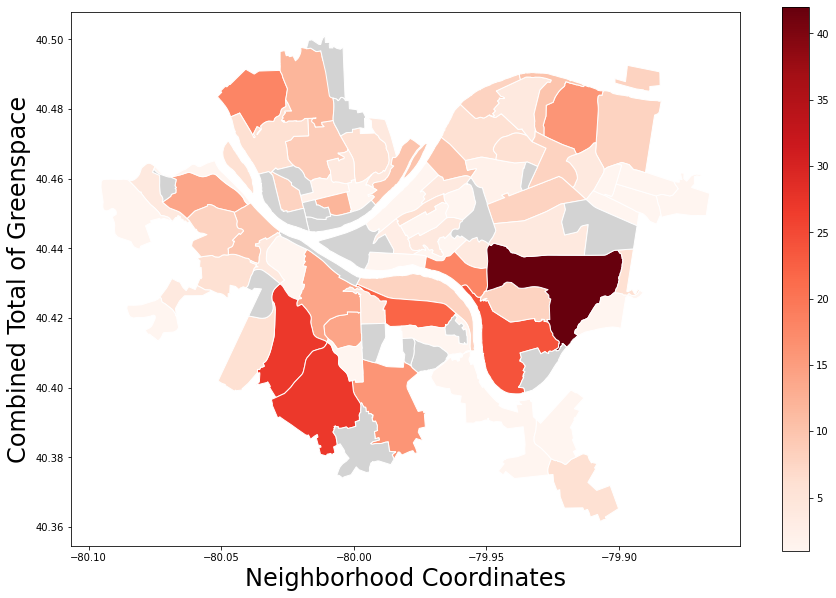

In [26]:
# Use Counter from collections class to keep tally number of playfields per neighborhood
greenways = collections.Counter()
with open('Greenways.csv') as file:
    # Iterate over Greenways.csv
    for x in csv.reader(file, delimiter=','):
        # "neighborhood" is the 7th column
        greenways[x[9]] += 1
        
print("***GREENWAYS***")
print(greenways.most_common())
print('\n')


fields = collections.Counter()
with open('Playfields.csv') as file:
    # Iterate over Playfields.csv
    for x in csv.reader(file,delimiter=','):
        # "neighborhood" is the 11th column of the csv
        fields[x[11]] += 1

# Print out the most commonly occurring neighborhoods, or those with the most playfields
print("***PLAYFIELDS***")
print(fields.most_common())
print('\n')
print("***PLAYGROUNDS***")

playgrounds = collections.Counter()
with open('Playgrounds.csv') as file:
    for x in csv.reader(file, delimiter=','):
        playgrounds[x[7]] += 1

print(playgrounds.most_common())

# Optional set without greenways included in it
#groundsAndFields = playgrounds.most_common() + fields.most_common()
completeSet = playgrounds.most_common() + fields.most_common() + greenways.most_common()


# Convert the new combined list to a pandas dataframe
df = pd.DataFrame(completeSet)
# Make list of headers to be used for the new csv
headers = ['Neighborhood', 'Number']
# Now able to convert dataframe to csv for easier visualization
df.to_csv('completeSet.csv', index=False, header=headers)

df = pd.read_csv('completeSet.csv', header=0)
#df.columns = df.columns.str.strip()
df['Total'] = df.groupby(['Neighborhood'])['Number'].transform('sum')

print(df['Total'])
headers2 = ['Neighborhood', 'Single Number', 'Combined Total']
df.to_csv('totals.csv', index=False,header=headers2)



df5 = pd.read_csv("totals.csv")
# Dataframe containing the totals of greenways, playgrounds, and fields per neighborhood
combineddf = df5.groupby("Neighborhood").sum()['Combined Total']
# Merge with the Pittsburgh shapefile
combined_map = neighborhoods.merge(combineddf, how='left', left_on='hood', right_on='Neighborhood')
# Create new plot as summary of previous three
combined_map.plot(column='Combined Total',
                  cmap='Reds',
                  edgecolor="white",
                  legend=True,
                  figsize=(15,10),
                  missing_kwds={"color": "lightgrey"})

plt.xlabel('Neighborhood Coordinates', fontsize=24)
plt.ylabel('Combined Total of Greenspace', fontsize=24)
plt.tick_params(axis='y', which='Neighborhood Coordinates', labelsize=20)
plt.show()

#
#
#
#
# Should add a stacked bar graph or something here. Just have to separate
# single count per neighborhood and combined count
#
#
#

## **Playgrounds.csv**

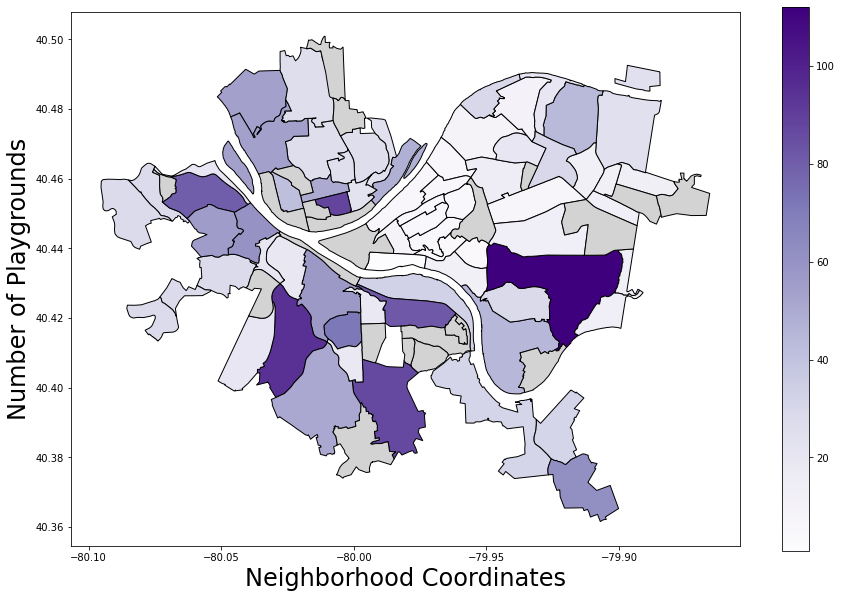

In [25]:
df3 = pd.read_csv("Playgrounds.csv")
playgrounds = df3.groupby("neighborhood").sum()['ward']

# For playfields, need to go through to count the number of fields per
# neighborhood b/c playfields.csv doesn't have any useful numerical
# data; only info on its location and field dimensions

playgrounds_map = neighborhoods.merge(playgrounds, how='left', left_on='hood', right_on='neighborhood')

playgrounds_map.plot(column='ward',
                    cmap='Purples',
                    edgecolor="black",
                    legend=True,
                    figsize=(15,10),
                    missing_kwds={"color":"lightgrey"})

plt.xlabel('Neighborhood Coordinates', fontsize=24)
plt.ylabel('Number of Playgrounds', fontsize=24)
plt.tick_params(axis='y', which='Neighborhood Coordinates', labelsize=20)
plt.show()